##### Clustering Assignment:
You are owning a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand your customers from various perspectives so that you can help your team plan their strategy.

Customer Id : Id given to each customer

Age: Age of customer

Gender: Gender of customer

Annual Income: Annual Income of customer

Spending score: Score that defines the spending of the customer(1-100). Value close to 100 indicates a better score whereas 

value close to zero indicate a poor score

Things to try out:
Try plotting different types of graphs such as histogram, box plot, scatter plot to understand relation between different customers. This might help you to better understand the cluster that you will try to form.

Try out different clustering methods that you have learned so far (k means, hierarchical clustering, DBSCAN etc.) and select the appropriate number of clusters.

Understand each cluster carefully and investigate what variables or combination of variables are there that separate a cluster from the rest of the clusters.

After deep examination of each cluster think about the strategies that might help you generate more revenue. You might want to target different clusters with different strategies.

### Importing essential libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

### Creating dataframe of data

In [12]:
df = pd.read_csv('assignment_shala_clustering.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
df.shape

(200, 5)

In [21]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Data Visualizations

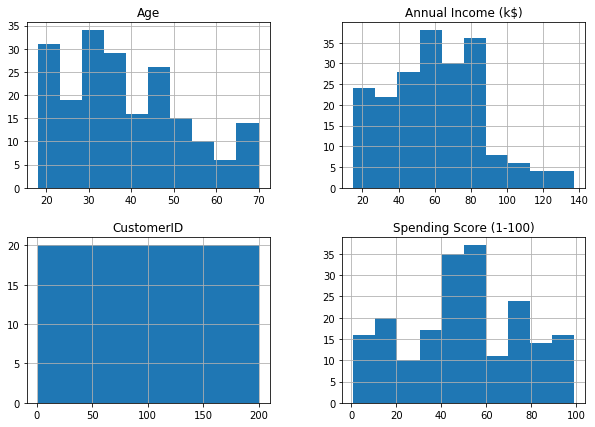

In [24]:
df.hist(figsize=(10,7))
plt.show()

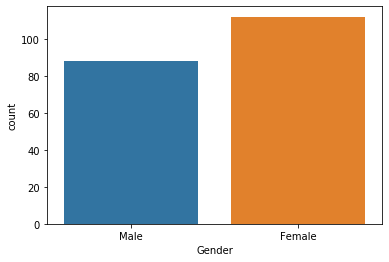

In [25]:
sns.countplot(x='Gender', data=df)
plt.show()

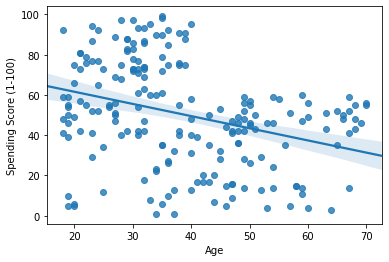

In [30]:
sns.regplot(x=df['Age'], y=df['Spending Score (1-100)'])
plt.show()

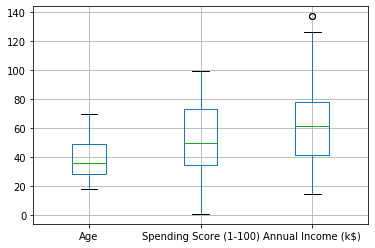

In [39]:
df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].boxplot()
plt.show()

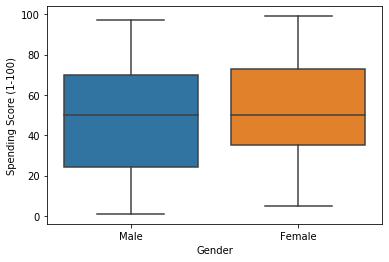

In [40]:
sns.boxplot(x=df['Gender'], y=df['Spending Score (1-100)'])
plt.show()

In [41]:
#Encoding categorical variable Gender to numeric
df.Gender = df.Gender.apply(lambda x:1 if x=='Male' else 0)

In [42]:
df.Gender.value_counts()

0    112
1     88
Name: Gender, dtype: int64

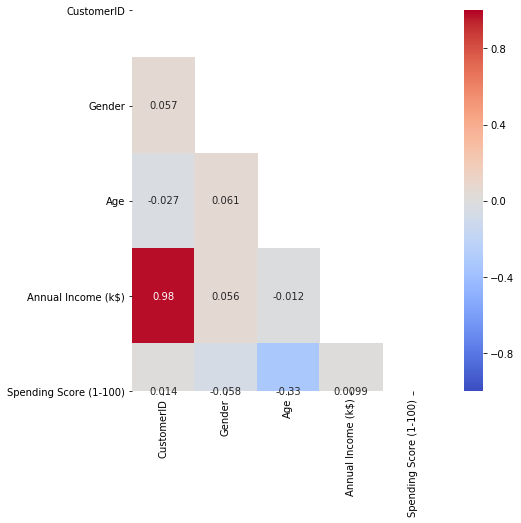

In [47]:
#Correlation
plt.figure(figsize=(7,7))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), vmin = -1, cmap="coolwarm", annot=True, mask=mask)
plt.show()

### Model

In [48]:
#Splitting data into train and test sets
x, y = train_test_split(df, test_size=0.2)

In [63]:
#Initially we assume 5 cluster to help us group the similar instances together
clusters = 5
kmeans = KMeans(n_clusters=clusters)
predy = kmeans.fit_predict(x)

In [64]:
#Checking the sum of squares within the cluster
kmeans.inertia_

123756.19290392956

##### The KMeans Algorithm finds n cluster centroids (n is number of clusters we input to the algorithm to demarcate) and assigns each instance to the closest centroid. We can see the five centroids that algorithms found:

In [65]:
kmeans.cluster_centers_

array([[162.5483871 ,   0.5483871 ,  40.77419355,  86.96774194,
         17.22580645],
       [ 37.07142857,   0.35714286,  45.14285714,  33.78571429,
         30.32142857],
       [160.875     ,   0.5625    ,  32.875     ,  86.3125    ,
         82.71875   ],
       [ 93.82692308,   0.40384615,  39.46153846,  58.28846154,
         50.11538462],
       [ 22.        ,   0.47058824,  25.17647059,  25.05882353,
         79.11764706]])

In [66]:
kmeans.predict(y)

array([3, 4, 0, 4, 1, 1, 2, 1, 1, 4, 3, 0, 3, 2, 4, 0, 1, 0, 2, 2, 3, 1,
       3, 4, 2, 0, 3, 3, 1, 1, 4, 3, 1, 2, 4, 3, 3, 3, 1, 2])

In [67]:
kmeans.transform(y)

array([[101.45630534,  39.89292109, 105.58805289,  26.18283885,
         70.19535272],
       [179.51510303,  49.12464623, 180.96829671, 105.03956531,
         46.79780553],
       [ 14.7984728 , 122.95156774,  67.73680251,  69.04209065,
        153.68906506],
       [135.82517686,  41.91252126, 125.80848308,  55.85904903,
         31.16520329],
       [174.15934849,  40.05195924, 175.86916135,  98.83845937,
         43.79805813],
       [128.0774512 ,  27.66797032, 127.26458429,  50.98758043,
         43.98100408],
       [ 76.65040848, 149.89597158,  12.14596287,  85.73753942,
        153.36319603],
       [127.01699641,  36.31826788, 119.72348105,  46.41786265,
         40.1743174 ],
       [124.0249505 ,  33.15788222, 119.75636482,  44.58055255,
         44.13521219],
       [154.24099688,  49.44205277, 141.47667445,  74.07767942,
         13.39795471],
       [ 70.13830547,  83.18663704,  73.7196508 ,  31.51011273,
        108.71376022],
       [ 18.24726114, 121.14637903,  62.437

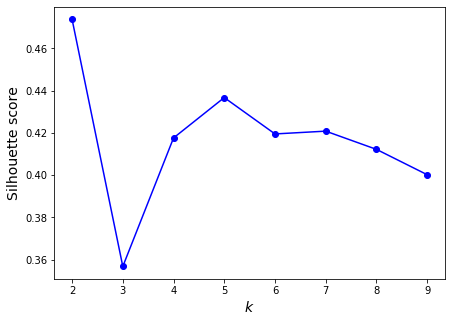

In [68]:
from sklearn.metrics import silhouette_score
kmeans_model = [KMeans(n_clusters=k, random_state=123).fit(x)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(x, model.labels_)
                     for model in kmeans_model[1:]]
plt.figure(figsize=(7, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()